In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")
sns.set_theme(color_codes=True)

In [181]:
df=pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,non-striker,total
0,0,335982,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,61,0,5,58,1,SC Ganguly,222
1,1,335982,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,Z Khan,61,1,5,58,1,BB McCullum,222
2,2,335982,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,0,5,58,1,BB McCullum,222
3,3,335982,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,0,5,58,1,BB McCullum,222
4,4,335982,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,0,5,58,1,BB McCullum,222


<Axes: xlabel='runs_last_5', ylabel='count'>

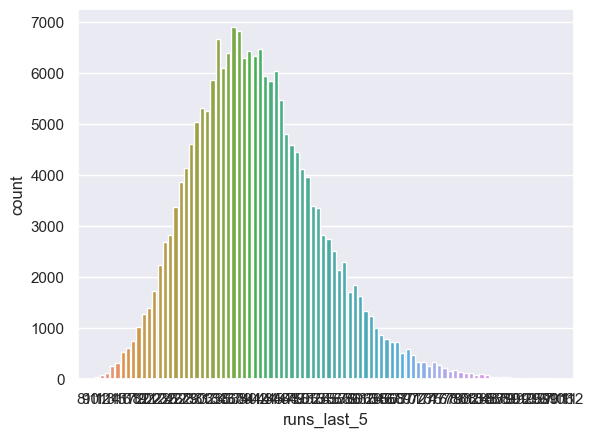

In [182]:
sns.countplot(data=df,x="runs_last_5")

<Axes: xlabel='wickets_last_5', ylabel='count'>

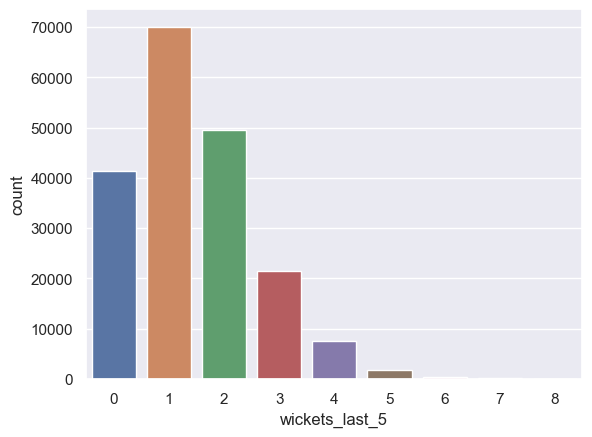

In [183]:
sns.countplot(data=df,x="runs_last_5")
sns.countplot(data=df,x="wickets_last_5")
sns.countplot(data=df,x="runs")

<Axes: xlabel='runs', ylabel='count'>

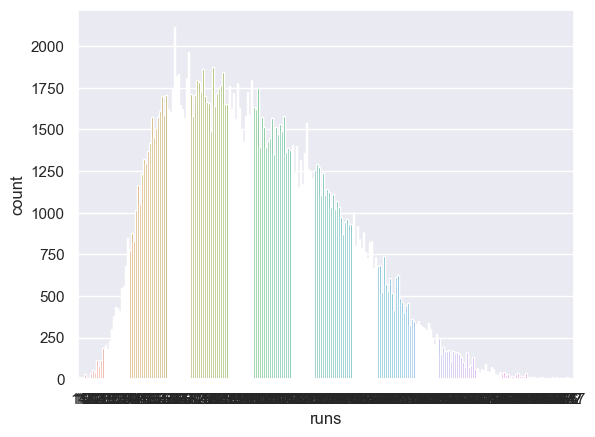

In [184]:
sns.countplot(data=df,x="runs")

In [189]:
df.isnull().sum()

Unnamed: 0        0
mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
non-striker       0
total             0
dtype: int64

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192509 entries, 0 to 192508
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      192509 non-null  int64 
 1   mid             192509 non-null  int64 
 2   date            192509 non-null  object
 3   venue           192509 non-null  object
 4   bat_team        192509 non-null  object
 5   bowl_team       192509 non-null  object
 6   batsman         192509 non-null  object
 7   bowler          192509 non-null  object
 8   runs            192509 non-null  int64 
 9   wickets         192509 non-null  int64 
 10  overs           192509 non-null  int64 
 11  runs_last_5     192509 non-null  int64 
 12  wickets_last_5  192509 non-null  int64 
 13  non-striker     192509 non-null  object
 14  total           192509 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 22.0+ MB


## Data Cleaning

In [191]:


columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [192]:
df.head()

,Unnamed: 0,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5,58,1,222
1,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5,58,1,222
2,2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5,58,1,222
3,3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5,58,1,222
4,4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5,58,1,222


In [193]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [194]:
# Keeping only consistent teams

consistent_teams = ['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians',
       'Sunrisers Hyderabad',
        'Gujarat Lions',
        'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru']

In [195]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [196]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

In [197]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Kings XI Punjab' 'Rajasthan Royals'
 'Delhi Daredevils' 'Mumbai Indians' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Delhi Capitals' 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']
['Royal Challengers Bangalore' 'Kolkata Knight Riders' 'Kings XI Punjab'
 'Chennai Super Kings' 'Delhi Daredevils' 'Rajasthan Royals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Gujarat Lions' 'Delhi Capitals'
 'Punjab Kings' 'Gujarat Titans' 'Lucknow Super Giants'
 'Royal Challengers Bengaluru']


In [198]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

## Data Preprocessing

In [199]:
# Converting categorical features using One Hot Encoding

encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [200]:
encoded_df.columns

Index(['Unnamed: 0', 'date', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Capitals', 'bat_team_Delhi Daredevils',
       'bat_team_Gujarat Lions', 'bat_team_Gujarat Titans',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Lucknow Super Giants', 'bat_team_Mumbai Indians',
       'bat_team_Punjab Kings', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore',
       'bat_team_Royal Challengers Bengaluru', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Capitals',
       'bowl_team_Delhi Daredevils', 'bowl_team_Gujarat Lions',
       'bowl_team_Gujarat Titans', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Lucknow Super Giants',
       'bowl_team_Mumbai Indians', 'bowl_team_Punjab Kings',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
     

In [201]:
# Rearranging the columns
encoded_df = encoded_df[['date' ,'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Capitals', 'bat_team_Delhi Daredevils',
       'bat_team_Gujarat Lions', 'bat_team_Gujarat Titans',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Lucknow Super Giants', 'bat_team_Mumbai Indians',
       'bat_team_Punjab Kings', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore',
       'bat_team_Royal Challengers Bengaluru', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Capitals',
       'bowl_team_Delhi Daredevils', 'bowl_team_Gujarat Lions',
       'bowl_team_Gujarat Titans', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Lucknow Super Giants',
       'bowl_team_Mumbai Indians', 'bowl_team_Punjab Kings',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Royal Challengers Bengaluru',
       'bowl_team_Sunrisers Hyderabad']]

## Model Training and data splitting

In [202]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2023]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2024]

In [203]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2023]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2024]['total'].values

In [204]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [205]:
X_test.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Capitals',
       'bat_team_Delhi Daredevils', 'bat_team_Gujarat Lions',
       'bat_team_Gujarat Titans', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Lucknow Super Giants',
       'bat_team_Mumbai Indians', 'bat_team_Punjab Kings',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Royal Challengers Bengaluru', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Capitals',
       'bowl_team_Delhi Daredevils', 'bowl_team_Gujarat Lions',
       'bowl_team_Gujarat Titans', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Lucknow Super Giants',
       'bowl_team_Mumbai Indians', 'bowl_team_Punjab Kings',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Royal Challengers Bengalu

In [206]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)




LinearRegression()

In [207]:
# Creating a pickle file for the classifier
import pickle
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [208]:
model_prediction=regressor.predict(X_test)

In [209]:
model_prediction

array([2.07993432e+11, 2.07993432e+11, 2.07993432e+11, ...,
       1.88376236e+02, 1.88376236e+02, 1.88376236e+02])

In [210]:
from sklearn.metrics import mean_squared_error

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, model_prediction))

# Print the RMSE
print("RMSE:", rmse)

RMSE: 93303501897.42972


In [211]:
from sklearn.metrics import mean_absolute_error

In [212]:
# Calculate the MAE
mae = mean_absolute_error(y_test,model_prediction)

# Print the MAE
print("MAE:", mae)

MAE: 43004869110.21095


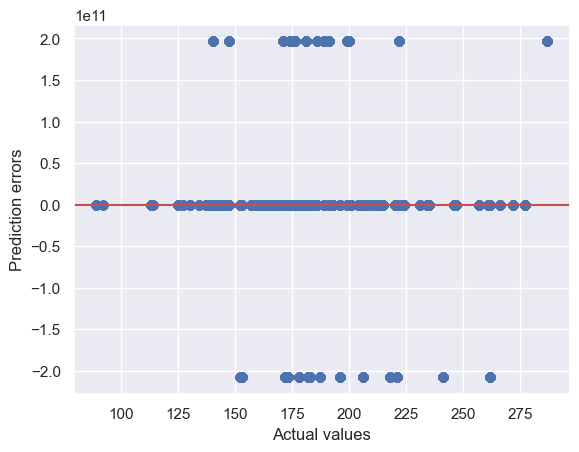

In [213]:
errors = y_test - model_prediction
plt.scatter(y_test, errors)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Actual values')
plt.ylabel('Prediction errors')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
X = selected_features
y = data['total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
